In [1]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
import pandas as pd 
data = pd.read_csv('online_retail.csv')
data.head(2)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.shape

(541909, 9)

In [4]:
data.columns

Index(['index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
data.nunique()

index          541909
InvoiceNo       25900
StockCode        4070
Description      4223
Quantity          722
InvoiceDate     23260
UnitPrice        1630
CustomerID       4372
Country            38
dtype: int64

In [6]:
data.isna().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
data['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 541909, dtype: object

In [8]:
data['InvoiceNo'].str.split(expand=True)[1:]

,0
1,536365
2,536365
3,536365
4,536365
5,536365
...,...
541904,581587
541905,581587
541906,581587
541907,581587


In [9]:
data[data['StockCode'] == 'pads']

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [10]:
data["StockCode"] = data['StockCode'].str.lower()

In [11]:
data['Description'] = data['Description'].str.lower()

In [12]:
data['Description'].value_counts()

white hanging heart t-light holder     2369
regency cakestand 3 tier               2200
jumbo bag red retrospot                2159
party bunting                          1727
lunch bag red retrospot                1638
                                       ... 
historic computer difference?....se       1
ruby glass necklace 42"                   1
wrong barcode                             1
barcode problem                           1
blue gingham rose cushion cover           1
Name: Description, Length: 4206, dtype: int64

###### Description Column Cleaning:

In [13]:
a = []
for i in data['Description']:
    if type(i) != float:
        if '?' in i:
            a.append(i)
set(a)

{'?',
 '? sold as sets?',
 '??',
 '?? missing',
 '???',
 '????damages????',
 '????missing',
 '???lost',
 '???missing',
 '?display?',
 '?lost',
 '?missing',
 '?sold as sets?',
 'check?',
 'code mix up? 84930',
 'damages/dotcom?',
 'damages?',
 'historic computer difference?....se',
 'lost??',
 'missing?',
 'possible damages or lost?',
 'sold in set?',
 'wet?',
 'wrong code?'}

In [14]:
for i in a:
    data['Description'].replace(i,np.nan,inplace=True)

In [15]:
m = data.groupby(by='StockCode')['Description'].describe()[data.groupby(by='StockCode')['Description'].describe().unique==3].index

for i in m:
    print(data.loc[data['StockCode']==i]['Description'].unique())


["flower fairy,5 summer b'draw liners" 'flower fairy 5 drawer liners'
 'flower fairy 5 summer draw liners']
['red retrospot purse ' nan 'dotcom' 'adjustment']
['jumbo bag toys ' 'check' 'lost in space']
['hanging bauble t-light holder small' 'damages/display' 'damages']
['12 pencils tall tube posy' 'found' nan 'damaged']
['large cake towel, chocolate spots' 'large cake towel chocolate spots'
 'wet']
['victorian  metal postcard spring' 'sold as set on dotcom' 'wet rusty']
['white bell honeycomb paper ' 'check' 'wrongly marked']
['set of 4 rose botanical candles' 'mystery! only ever imported 1800'
 'check' nan]
['vintage union jack bunting' nan 'rcvd be air temp fix for dotcom sit'
 're dotcom quick fix.']
['assorted tutti frutti heart box' 'found' 'check']
['big doughnut fridge magnets' 'sold as set on dotcom and amazon' nan
 'check']
['white christmas garland stars trees' nan 'check' 'dotcom']
['christmas hanging heart with bell' 'hanging heart with bell' 'check' nan]
['glitter christm

In [16]:
# wrongly,damages,amazon,check,damages,lost in space

In [17]:
m = data.groupby(by='StockCode')['Description'].describe()[data.groupby(by='StockCode')['Description'].describe().unique==4].index

for i in m:
    print((data.loc[data['StockCode']==i]['Description'].unique()))

['painted metal heart with holly bell' 'check' 'amazon adjust' 'damaged']
['picnic basket wicker large' 'reverse 21/5/10 adjustment' nan
 'incorrectly put back into stock' 'found']
['gumball monochrome coat rack' 'wrong barcode (22467)' 'sold as 22467'
 'wrong code' nan]
['set of 6 ribbons vintage christmas' 'amazon' 'amazon sales' nan 'found']
['parisienne jewellery drawer ' 'breakages' 'check' 'dotcom adjust']
['mistletoe heart wreath cream' 'miseltoe heart wreath white'
 'miseltoe heart wreath cream' nan 'had been put aside']
['retro leaves magnetic notepad' 'reto leaves magnetic shopping list'
 'leaves magnetic  shopping list' 'vintage leaf magnetic notepad']
['mailout' 'jumbo bag doiley patterns' 'jumbo bag vintage doiley '
 'jumbo bag vintage doily ']
['mailout' 'lunch bag doiley pattern ' 'lunch bag vintage doiley '
 'lunch bag vintage doily ']
['doiley storage tin' 'doiley biscuit tin' 'storage tin vintage doiley '
 'storage tin vintage doily ']
['folkart heart napkin rings' na

In [18]:
a = []
for i in data['Description']:
    if type(i) != float:
        if 'wrongly' in i:
            a.append(i)
a

['wrongly sold as sets',
 'wrongly sold sets',
 'wrongly sold (22719) barcode',
 'wrongly marked. 23343 in box',
 'stock creditted wrongly',
 'wrongly coded 20713',
 'wrongly coded-23343',
 'wrongly marked 23343',
 '20713 wrongly marked',
 'wrongly coded 23343',
 'wrongly coded 20713',
 'wrongly marked',
 'wrongly mrked had 85123a in box',
 'wrongly marked carton 22804']

In [19]:
for i in a:
    data['Description'].replace(i,np.nan,inplace=True)

In [20]:
data.isna().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1550
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [21]:
data.groupby(by='StockCode')['Description'].describe().unique.value_counts()

1    3251
2     485
0     110
3      94
4      15
5       2
7       1
Name: unique, dtype: int64

In [22]:
a = []
for i in data['Description']:
    if type(i) != float:
        if 'wrong' in i:
            a.append(i)
a

['wrong barcode (22467)',
 'wrong barcode',
 'wrong code',
 'sold with wrong barcode']

In [23]:
for i in a:
    data['Description'].replace(i,np.nan,inplace=True)

In [24]:
a = []
for i in data['Description']:
    if type(i) != float:
        if 'amazon' in i:
            a.append(i)
a

['amazon',
 'amazon',
 'amazon fee',
 'amazon fee',
 'amazon fee',
 'amazon',
 'amazon fee',
 'amazon fee',
 'amazon fee',
 'amazon fee',
 'amazon',
 'amazon sales',
 'amazon fee',
 'amazon fee',
 'amazon fee',
 'amazon fee',
 'amazon sold sets',
 'amazon fee',
 'amazon fee',
 'amazon fee',
 'amazon fee',
 'amazon fee',
 'amazon fee',
 'sold as set on dotcom and amazon',
 'amazon fee',
 'amazon fee',
 'amazon fee',
 'amazon fee',
 'amazon fee',
 'amazon fee',
 'amazon',
 'amazon fee',
 'amazon fee',
 'amazon',
 'amazon fee',
 'amazon fee',
 'amazon',
 'amazon',
 'amazon fee',
 'amazon adjustment',
 'amazon',
 'amazon',
 'amazon fee',
 'amazon fee',
 'amazon fee',
 'amazon fee',
 'amazon adjust',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon fee',
 'amazon fee',
 'amazon']

In [25]:
for i in a:
    data['Description'].replace(i,np.nan,inplace=True)

In [26]:
a = []
for i in data['Description']:
    if type(i) != float:
        if 'damag' in i:
            a.append(i)
a

['damages',
 'damages',
 'samples/damages',
 'damages',
 'damages',
 'damages/display',
 'damages',
 'damaged stock',
 'damages',
 'damaged',
 'damages',
 'damages',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damages',
 'damages',
 'damaged',
 'damaged',
 'damages',
 'damages/showroom etc',
 'damages/credits from asos.',
 'damaged',
 'damaged',
 'damages',
 'damages',
 'damaged',
 'damages',
 'damages',
 'damaged',
 'wet damaged',
 'wet damaged',
 'wet damaged',
 'wet damaged',
 'wet damaged',
 'damaged',
 'water damaged',
 'damaged',
 'damaged',
 'damaged',
 'water damage',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damages',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damages/samples',
 'damages',
 'damages',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damaged',
 'damages',
 'damages',
 'damages',
 'damaged',
 'damag

In [27]:
for i in a:
    data['Description'].replace(i,np.nan,inplace=True)

In [28]:
a = []
for i in data['Description']:
    if type(i) != float:
        if 'found' in i:
            a.append(i)
a

['found',
 'found',
 'found',
 'found',
 'found',
 'found',
 'found',
 'found some more on shelf',
 'found',
 'found',
 'found',
 'found',
 'found',
 'found',
 'found box',
 'found in w/hse',
 'found',
 'found',
 'found',
 'found',
 'found',
 'found',
 'found',
 'found',
 'found',
 'found',
 'found',
 'found by jackie',
 'found',
 'found',
 'found',
 'found',
 'found',
 'found',
 'found',
 'found',
 'found',
 'found']

In [29]:
for i in a:
    data['Description'].replace(i,np.nan,inplace=True)

In [30]:
a = []
for i in data['Description']:
    if type(i) != float:
        if 'sold ' in i:
            a.append(i)
a

['dotcom sold sets',
 "dotcom sold in 6's",
 'sold as 22467',
 'sold as set/6 by dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set by dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as set on dotcom',
 'sold as 1 on dotcom',
 'sold as 1',
 'sold as 1']

In [31]:
for i in a:
    data['Description'].replace(i,'dotcom',inplace=True)

In [32]:
for i in a:
    data['Description'].replace(['breakages','check'],np.nan,inplace=True)

In [33]:
data.groupby(by='StockCode')['Description'].describe().unique.value_counts()

1    3492
2     311
0     113
3      34
4       7
6       1
Name: unique, dtype: int64

In [34]:
m = data.groupby(by='StockCode')['Description'].describe()[data.groupby(by='StockCode')['Description'].describe().unique==6].index

for i in m:
    print((data.loc[data['StockCode']==i]['Description'].unique()))

['rabbit night light' nan 'temp adjustment'
 'allocate stock for dotcom orders ta'
 'add stock to allocate online orders' 'for online retail orders'
 'website fixed']


In [35]:
for i in ['temp adjustment','allocate stock for dotcom orders ta',
'add stock to allocate online orders' ,'for online retail orders','website fixed']:
    data['Description'].replace(i,np.nan,inplace=True)

In [36]:
data.groupby(by='StockCode')['Description'].describe().unique.value_counts()

1    3493
2     311
0     113
3      34
4       7
Name: unique, dtype: int64

In [37]:
m = data.groupby(by='StockCode')['Description'].describe()[data.groupby(by='StockCode')['Description'].describe().unique==2].index

for i in m:
    print((data.loc[data['StockCode']==i]['Description'].unique()))

['blue polkadot garden parasol' nan 'wet/rusty']
['ice cream design garden parasol' 'wet/rusty']
['wrap, carousel' 'wrap carousel']
[nan 'alan hodge cant mamage this section' 'the king gift bag 25x24x12cm']
['flower fairy incense bouquet' 'adjustment']
['vippassport cover ' 'vip passport cover ']
['pink polkadot childrens umbrella' 'mia' nan]
['jumbo bag toys ' nan 'lost in space']
['jumbo bag owls' nan 'marked as 23343']
['lunch bag red retrospot' 'lunch bag red spotty']
['set/5 red retrospot lid glass bowls' 'set/5 red spotty lid glass bowls']
['jumbo bag charlie and lola toys' nan 'taig adjust no stock']
['set/6 collage paper plates' 'wet/mouldy']
['christmas toilet roll' nan 'had been put aside']
['swiss roll towel, pink  spots' 'swiss roll towel pink  spots']
['painted metal pears assorted' 'dotcom']
['gin + tonic diet metal sign' nan 'gin and tonic diet metal sign']
['strawberry ceramic trinket box' 'strawberry ceramic trinket pot']
['pink  polkadot plate ' 'pink polkadot plate '

['knickerbockerglory magnet assorted ' 'dotcom']
['classic sugar dispenser' 'classic cafe sugar dispenser']
['vintage  2 meter folding ruler' 'vintage  2 metre folding ruler']
['bundle of 3 retro note books' 'bundle of 3 retro exercise books']
['gymkhanna treasure book box' 'gymkhana treasure book box']
['sketchbook magnetic shopping list' 'vegetable magnetic  shopping list']
['mailout ' 'jumbo bag pears']
['mailout' 'jumbo bag vintage leaf']
['charlotte bag vintage alphabet ' 'charlotte bag alphabet  design']
['heart wreath decoration with bell' 'painted heart wreath with bell']
['jingle bell heart antique gold' 'bell heart antique gold']
['vintage donkey tail game ' 'donkey tail game ']
['wrap vintage petals  design' 'wrap vintage leaf design']
['storage tin vintage leaf' 'biscuit tin vintage leaf']
['set of 4 knick knack tins leaves ' 'set of 4 knick knack tins leaf']
['vintage red enamel trim plate' 'enamel dinner plate pantry']
['vintage red trim enamel bowl ' 'enamel bowl pantry'

['set/3 decoupage stacking tins' 'mix up with c' nan]
['midnight blue drop crystal necklace' 'stock check']
['silver/mop orbit necklace' nan 'silver m.o.p. orbit necklace']
['gold m pearl  orbit necklace' nan 'gold m.o.p. orbit necklace']
['silver/black orbit necklace' nan 'silver and black orbit necklace']
['diamante ring assorted in box.' 'crushed boxes']
['black+white necklace w tassel' 'stock check']
['boxed glass ashtray' 'ebay']
['ooh la la dogs collar' 'ebay']
['dotcomgiftshop gift voucher £20.00'
 'to push order througha s stock was ']


In [38]:
a = []
for i in data['Description']:
    if type(i) != float:
        if 'stock ' in i:
            a.append(i)
a

['to push order througha s stock was ',
 'incorrect stock entry.',
 'incorrect stock entry.',
 'incorrect stock entry.',
 'stock check',
 'stock check']

In [39]:
for i in a:
    data['Description'].replace(i,np.nan,inplace=True)

In [40]:
a = []
for i in data['Description']:
    if type(i) != float:
        if 'ebay' in i:
            a.append(i)
a

['ebay', 'ebay', 'ebay', 'ebay', 'ebay']

In [41]:
for i in a:
    data['Description'].replace(i,np.nan,inplace=True)

In [42]:
a = []
for i in data['Description']:
    if type(i) != float:
        if 'incorre' in i:
            a.append(i)
a

['incorrectly made-thrown away.',
 'incorrectly credited c550456 see 47',
 'incorrectly credited c550456 see 47',
 'incorrectly put back into stock']

In [43]:
for i in a:
    data['Description'].replace(i,np.nan,inplace=True)

In [44]:
data.isna().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1952
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [45]:
m = data.groupby(by='StockCode')['Description'].describe()[data.groupby(by='StockCode')['Description'].describe().unique==4].index

for i in m:
    print((data.loc[data['StockCode']==i]['Description'].unique()))

['please one person metal sign' 'on cargo order' 'adjustment' nan 'dotcom']
['assorted creepy crawlies' 'merchant chandler credit error, sto' 'dotcom'
 nan 'oops ! adjustment']
['mistletoe heart wreath cream' 'miseltoe heart wreath white'
 'miseltoe heart wreath cream' nan 'had been put aside']
['retro leaves magnetic notepad' 'reto leaves magnetic shopping list'
 'leaves magnetic  shopping list' 'vintage leaf magnetic notepad']
['mailout' 'jumbo bag doiley patterns' 'jumbo bag vintage doiley '
 'jumbo bag vintage doily ']
['mailout' 'lunch bag doiley pattern ' 'lunch bag vintage doiley '
 'lunch bag vintage doily ']
['doiley storage tin' 'doiley biscuit tin' 'storage tin vintage doiley '
 'storage tin vintage doily ']


In [46]:
a = []
for i in data['Description']:
    if type(i) != float:
        if 'adjust' in i:
            a.append(i)
a

['reverse 21/5/10 adjustment',
 'reverse 21/5/10 adjustment',
 'adjustment',
 'adjustment',
 'adjustment',
 'adjustment',
 'adjust',
 'adjustment',
 'adjustment',
 'reverse previous adjustment',
 'adjust bad debt',
 'adjust bad debt',
 'adjust bad debt',
 'taig adjust no stock',
 'taig adjust',
 'taig adjust',
 'oops ! adjustment',
 'adjustment',
 'adjustment',
 'adjustment',
 're-adjustment',
 'adjustment',
 'adjustment',
 'adjustment',
 'adjustment',
 'adjustment',
 'adjustment',
 'adjustment',
 'adjustment',
 'adjustment',
 'dotcom adjust']

In [47]:
for i in a:
    data['Description'].replace(i,np.nan,inplace=True)

In [48]:
a = []
for i in data['Description']:
    if type(i) != float:
        if 'had ' in i:
            a.append(i)
        elif 'error' in i:
            a.append(i)
        elif 'did' in i:
            a.append(i)
        elif 'rcvd ' in i:
            a.append(i)
a

['rcvd be air temp fix for dotcom sit',
 'merchant chandler credit error, sto',
 'did  a credit  and did not tick ret',
 'not rcvd in 10/11/2010 delivery',
 'had been put aside.',
 'sale error',
 'had been put aside',
 'had been put aside',
 'had been put aside',
 'had been put aside',
 'had been put aside']

In [49]:
for i in a:
    data['Description'].replace(i,np.nan,inplace=True)

In [50]:
data.groupby(by='StockCode')['Description'].describe().unique.value_counts()

1    3521
2     289
0     118
3      26
4       4
Name: unique, dtype: int64

In [51]:
m = data.groupby(by='StockCode')['Description'].describe()[data.groupby(by='StockCode')['Description'].describe().unique==2].index

for i in m:
    print((data.loc[data['StockCode']==i]['Description'].unique()))

['blue polkadot garden parasol' nan 'wet/rusty']
['ice cream design garden parasol' 'wet/rusty']
['wrap, carousel' 'wrap carousel']
[nan 'alan hodge cant mamage this section' 'the king gift bag 25x24x12cm']
['vippassport cover ' 'vip passport cover ']
['red retrospot purse ' nan 'dotcom']
['pink polkadot childrens umbrella' 'mia' nan]
['jumbo bag toys ' nan 'lost in space']
['jumbo bag owls' nan 'marked as 23343']
['lunch bag red retrospot' 'lunch bag red spotty']
['set/5 red retrospot lid glass bowls' 'set/5 red spotty lid glass bowls']
['set/6 collage paper plates' 'wet/mouldy']
['swiss roll towel, pink  spots' 'swiss roll towel pink  spots']
['painted metal pears assorted' 'dotcom']
['gin + tonic diet metal sign' nan 'gin and tonic diet metal sign']
['strawberry ceramic trinket box' 'strawberry ceramic trinket pot']
['pink  polkadot plate ' 'pink polkadot plate ']
['glass chalice green  large ' 'broken' nan]
['joy large wood letters' 'show samples']
['french lavender scent heart' 'd

['bundle of 3 retro note books' 'bundle of 3 retro exercise books']
['gymkhanna treasure book box' 'gymkhana treasure book box']
['sketchbook magnetic shopping list' 'vegetable magnetic  shopping list']
['mailout ' 'jumbo bag pears']
['mailout' 'jumbo bag vintage leaf']
['charlotte bag vintage alphabet ' 'charlotte bag alphabet  design']
['heart wreath decoration with bell' 'painted heart wreath with bell']
['jingle bell heart antique gold' 'bell heart antique gold']
['vintage donkey tail game ' 'donkey tail game ']
['wrap vintage petals  design' 'wrap vintage leaf design']
['storage tin vintage leaf' 'biscuit tin vintage leaf']
['set of 4 knick knack tins leaves ' 'set of 4 knick knack tins leaf']
['vintage red enamel trim plate' 'enamel dinner plate pantry']
['vintage red trim enamel bowl ' 'enamel bowl pantry']
['vintage red enamel trim mug ' 'enamel mug pantry']
['vintage red enamel trim jug ' 'enamel jug pantry']
['16 piece cutlery set pantry design' '16 pc cutlery set pantry desi

In [52]:
a = []
for i in data['Description']:
    if type(i) != float:
        if 'find' in i:
            a.append(i)
        elif 'missing' in i:
            a.append(i)
        
        
a

['missing', 'missing', "can't find", 'missing', 'missing']

In [53]:
for i in a:
    data['Description'].replace(i,np.nan,inplace=True)

In [54]:
m = data.groupby(by='StockCode')['Description'].describe()[data.groupby(by='StockCode')['Description'].describe().unique==0].index

for i in m:
    print((data.loc[data['StockCode']==i]['Description'].unique()))

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]


In [55]:
a = []
for i in data['Description']:
    if type(i) != float:
        if 'lost in space' in i:
            a.append(i)
        elif 'discount' in i:
            a.append(i)
        
        
        
set(a)

{'discount', 'lost in space'}

In [56]:
for i in a:
    data['Description'].replace(i,np.nan,inplace=True)

In [57]:
data['Description'].replace('manual',np.nan,inplace=True)

In [58]:
data['Description'].isna().sum()

2649

In [59]:
data.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123a,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406b,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029g,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029e,red woolly hottie white heart.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [60]:
data['Description'].isna().sum()

2649

In [61]:
data['Description'].nunique()

4097

In [62]:
data.duplicated().sum()

0

In [63]:
data.shape

(541909, 9)

In [64]:
data[(data['UnitPrice'] == 0.0) & (data['CustomerID'].isna()) & (data['Description'].isna())]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,1987,536549,85226a,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...
535334,535334,581211,22142,NaN,14,12/7/2011 18:36,0.0,NaN,United Kingdom
535336,535336,581213,22576,NaN,-30,12/7/2011 18:38,0.0,NaN,United Kingdom
536908,536908,581226,23090,NaN,-338,12/8/2011 9:56,0.0,NaN,United Kingdom
536981,536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [65]:
data.nunique()

index          541909
InvoiceNo       25900
StockCode        3958
Description      4097
Quantity          722
InvoiceDate     23260
UnitPrice        1630
CustomerID       4372
Country            38
dtype: int64

In [66]:
li_nan = list(data[(data['UnitPrice'] == 0.0) & (data['CustomerID'].isna()) & (data['Description'].isna())].index)

In [67]:
len(li_nan)

1963

In [68]:
data[data['Quantity']<0]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,141,C536379,d,NaN,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,154,C536383,35004c,set of 3 coloured flying ducks,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,235,C536391,22556,plasters in tin circus parade,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,236,C536391,21984,pack of 12 pink paisley tissues,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,237,C536391,21983,pack of 12 blue paisley tissues,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
540449,540449,C581490,23144,zinc t-light holder stars small,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,541541,C581499,m,NaN,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,541715,C581568,21258,victorian sewing box large,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,541716,C581569,84978,hanging heart jar t-light holder,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [69]:
data['StockCode'].value_counts()

85123a    2380
22423     2203
85099b    2159
47566     1727
20725     1639
          ... 
72732        1
72759        1
16053        1
21310        1
37330        1
Name: StockCode, Length: 3958, dtype: int64

invoice = []
for i in data[data['Quantity']<1]['InvoiceNo']:
    if i[0] != 'C':
        

In [70]:
data.drop(index=li_nan,inplace=True)
data.shape

(539946, 9)

In [71]:
data[data['UnitPrice'] <0]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,299983,A563186,b,NaN,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,299984,A563187,b,NaN,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [72]:
data.drop(index=[299983,299982],inplace=True)

In [73]:
data.drop(index=list(data[data['Quantity']<0].index),inplace=True)
data.shape

(530547, 9)

In [74]:
data.isna().sum()

index               0
InvoiceNo           0
StockCode           0
Description       331
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132623
Country             0
dtype: int64

In [75]:
data_new = data.dropna()

In [76]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Feature Engineering:

In [77]:
data_new['total'] = data_new['Quantity']*data_new['UnitPrice']

In [78]:
data_new.shape

(397634, 10)

In [79]:
data_new[data_new['total'] ==0]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
9302,9302,537197,22841,round cake tin vintage green,1,12/5/2010 14:02,0.0,12647.0,Germany,0.0
33576,33576,539263,22580,advent calendar gingham sack,4,12/16/2010 14:36,0.0,16560.0,United Kingdom,0.0
40089,40089,539722,22423,regency cakestand 3 tier,10,12/21/2010 13:45,0.0,14911.0,EIRE,0.0
47068,47068,540372,22090,paper bunting retrospot,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,0.0
47070,47070,540372,22553,plasters in tin skulls,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,0.0
56674,56674,541109,22168,organiser wood antique white,1,1/13/2011 15:10,0.0,15107.0,United Kingdom,0.0
86789,86789,543599,84535b,fairy cakes notebook a6 size,16,2/10/2011 13:08,0.0,17560.0,United Kingdom,0.0
130188,130188,547417,22062,ceramic bowl with love heart design,36,3/23/2011 10:25,0.0,13239.0,United Kingdom,0.0
139453,139453,548318,22055,mini cake stand hanging strawbery,5,3/30/2011 12:45,0.0,13113.0,United Kingdom,0.0
145208,145208,548871,22162,heart garland rustic padded,2,4/4/2011 14:42,0.0,14410.0,United Kingdom,0.0


In [80]:
data_new.drop(index=list(data_new[data_new['total'] ==0].index),inplace=True)

In [81]:
encoding_mapping = data_new.groupby('Description')['UnitPrice'].mean().to_dict()
# Map the encoding back to the DataFrame
data_new['Description'] = data_new['Description'].map(encoding_mapping)

In [82]:
data_new.Country.value_counts()

United Kingdom          354073
Germany                   9032
France                    8336
EIRE                      7234
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1455
Australia                 1182
Norway                    1068
Italy                      758
Channel Islands            747
Finland                    684
Cyprus                     613
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  215
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [83]:
data_new.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [84]:
data_new.head(5)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,0,536365,85123a,2.893107,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,3.716320,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406b,3.816311,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029g,4.001595,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029e,4.054756,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [85]:
data_new['CustomerID'] = data_new['CustomerID'].astype(int)

In [86]:
data_new.drop(columns = ['index'],inplace = True)

In [87]:
li = list(data_new.InvoiceNo.unique())


In [88]:
data_new.dtypes

InvoiceNo       object
StockCode       object
Description    float64
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int32
Country         object
total          float64
dtype: object

In [89]:
data_new['InvoiceNo'] = data_new['InvoiceNo'].astype(int)

In [90]:
data_new.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'total'],
      dtype='object')

In [91]:

data_new['Quantity_UnitPrice_Ratio'] = data_new['Quantity']/data_new['UnitPrice']


In [92]:
data_new['InvoiceDate'] = pd.to_datetime(data_new['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [93]:
data_new['InvoiceDate'].dtype

dtype('<M8[ns]')

In [94]:
data_new['DayOfWeek'] = data_new['InvoiceDate'].dt.dayofweek
data_new['Month'] = data_new['InvoiceDate'].dt.month
data_new['Quarter'] = data_new['InvoiceDate'].dt.quarter
data_new['Year'] = data_new['InvoiceDate'].dt.year

In [95]:
data_new.isna().sum()

InvoiceNo                   0
StockCode                   0
Description                 0
Quantity                    0
InvoiceDate                 0
UnitPrice                   0
CustomerID                  0
Country                     0
total                       0
Quantity_UnitPrice_Ratio    0
DayOfWeek                   0
Month                       0
Quarter                     0
Year                        0
dtype: int64

In [96]:
max_invoice_date = (data_new['InvoiceDate'].max())

#data_new['Recency'] = (max_invoice_date - data_new.groupby('CustomerID')['InvoiceDate'].max()).dt.days

a = dict((max_invoice_date - data_new.groupby('CustomerID')['InvoiceDate'].max()).dt.days)
data_new['Recency'] = data_new['CustomerID'].map(a)
data_new['Recency'].describe().T

count    397600.000000
mean         40.213219
std          65.644365
min           0.000000
25%           3.000000
50%          15.000000
75%          43.000000
max         373.000000
Name: Recency, dtype: float64

In [97]:
a = data_new.groupby('CustomerID')['InvoiceNo'].nunique()
data_new['Frequency'] = data_new['CustomerID'].map(a)

In [98]:
data_new['MonetaryValue'] = data_new['Quantity'] * data_new['UnitPrice']

monetary_per_customer = data_new.groupby('CustomerID')['MonetaryValue'].sum().reset_index()

data_new = pd.merge(data_new, monetary_per_customer, on='CustomerID', how='left', suffixes=('', '_total'))

data_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total,Quantity_UnitPrice_Ratio,DayOfWeek,Month,Quarter,Year,Recency,Frequency,MonetaryValue,MonetaryValue_total
0,536365,85123a,2.893107,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2.352941,2,12,4,2010,371,34,15.30,5391.21
1,536365,71053,3.716320,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1.769912,2,12,4,2010,371,34,20.34,5391.21
2,536365,84406b,3.816311,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2.909091,2,12,4,2010,371,34,22.00,5391.21
3,536365,84029g,4.001595,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1.769912,2,12,4,2010,371,34,20.34,5391.21
4,536365,84029e,4.054756,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1.769912,2,12,4,2010,371,34,20.34,5391.21


In [99]:
data_new.drop(columns = ['StockCode','MonetaryValue'],inplace=True)
data_new.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total,Quantity_UnitPrice_Ratio,DayOfWeek,Month,Quarter,Year,Recency,Frequency,MonetaryValue_total
0,536365,2.893107,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2.352941,2,12,4,2010,371,34,5391.21
1,536365,3.716320,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1.769912,2,12,4,2010,371,34,5391.21
2,536365,3.816311,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2.909091,2,12,4,2010,371,34,5391.21
3,536365,4.001595,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1.769912,2,12,4,2010,371,34,5391.21
4,536365,4.054756,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1.769912,2,12,4,2010,371,34,5391.21


In [100]:
data_new['Weekend'] = (data_new['InvoiceDate'].dt.dayofweek // 5 == 1).astype(int)


In [101]:
del data_new['InvoiceNo']

In [102]:
del data_new['InvoiceDate']

In [103]:
data_new.head()

,Description,Quantity,UnitPrice,CustomerID,Country,total,Quantity_UnitPrice_Ratio,DayOfWeek,Month,Quarter,Year,Recency,Frequency,MonetaryValue_total,Weekend
0,2.893107,6,2.55,17850,United Kingdom,15.30,2.352941,2,12,4,2010,371,34,5391.21,0
1,3.716320,6,3.39,17850,United Kingdom,20.34,1.769912,2,12,4,2010,371,34,5391.21,0
2,3.816311,8,2.75,17850,United Kingdom,22.00,2.909091,2,12,4,2010,371,34,5391.21,0
3,4.001595,6,3.39,17850,United Kingdom,20.34,1.769912,2,12,4,2010,371,34,5391.21,0
4,4.054756,6,3.39,17850,United Kingdom,20.34,1.769912,2,12,4,2010,371,34,5391.21,0


In [104]:
data_new.shape

(397600, 15)

In [105]:
data_new.dtypes

Description                 float64
Quantity                      int64
UnitPrice                   float64
CustomerID                    int32
Country                      object
total                       float64
Quantity_UnitPrice_Ratio    float64
DayOfWeek                     int64
Month                         int64
Quarter                       int64
Year                          int64
Recency                       int64
Frequency                     int64
MonetaryValue_total         float64
Weekend                       int32
dtype: object

In [106]:
data_new.head()

,Description,Quantity,UnitPrice,CustomerID,Country,total,Quantity_UnitPrice_Ratio,DayOfWeek,Month,Quarter,Year,Recency,Frequency,MonetaryValue_total,Weekend
0,2.893107,6,2.55,17850,United Kingdom,15.30,2.352941,2,12,4,2010,371,34,5391.21,0
1,3.716320,6,3.39,17850,United Kingdom,20.34,1.769912,2,12,4,2010,371,34,5391.21,0
2,3.816311,8,2.75,17850,United Kingdom,22.00,2.909091,2,12,4,2010,371,34,5391.21,0
3,4.001595,6,3.39,17850,United Kingdom,20.34,1.769912,2,12,4,2010,371,34,5391.21,0
4,4.054756,6,3.39,17850,United Kingdom,20.34,1.769912,2,12,4,2010,371,34,5391.21,0


In [107]:
df = data_new[['Description','Quantity','UnitPrice','total','Quantity_UnitPrice_Ratio','Recency','Frequency','MonetaryValue_total']]
df.head()

,Description,Quantity,UnitPrice,total,Quantity_UnitPrice_Ratio,Recency,Frequency,MonetaryValue_total
0,2.893107,6,2.55,15.30,2.352941,371,34,5391.21
1,3.716320,6,3.39,20.34,1.769912,371,34,5391.21
2,3.816311,8,2.75,22.00,2.909091,371,34,5391.21
3,4.001595,6,3.39,20.34,1.769912,371,34,5391.21
4,4.054756,6,3.39,20.34,1.769912,371,34,5391.21


## Scaling 

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_s = sc.fit_transform(df)
df_s = pd.DataFrame(df_s,columns=df.columns)
df_s

,Description,Quantity,UnitPrice,total,Quantity_UnitPrice_Ratio,Recency,Frequency,MonetaryValue_total
0,-0.015461,-0.038914,-0.029667,-0.022600,-0.071061,5.039080,0.413202,-0.194399
1,0.111311,-0.038914,0.026522,-0.006276,-0.073750,5.039080,0.413202,-0.194399
2,0.126709,-0.027763,-0.016288,-0.000900,-0.068496,5.039080,0.413202,-0.194399
3,0.155242,-0.038914,0.026522,-0.006276,-0.073750,5.039080,0.413202,-0.194399
4,0.163428,-0.038914,0.026522,-0.006276,-0.073750,5.039080,0.413202,-0.194399
...,...,...,...,...,...,...,...,...
397595,-0.330480,-0.005461,-0.143381,-0.039118,-0.016808,-0.612593,-0.396604,-0.340096
397596,-0.133541,-0.038914,-0.059768,-0.031345,-0.068736,-0.612593,-0.396604,-0.340096
397597,0.176980,-0.050065,0.077359,-0.018389,-0.077467,-0.612593,-0.396604,-0.340096
397598,0.180384,-0.050065,0.077359,-0.018389,-0.077467,-0.612593,-0.396604,-0.340096


### Lets Apply PCA :

In [109]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
df_pca = pca.fit_transform(df_s)

In [110]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29974633, 0.51355127, 0.69377899, 0.80383903, 0.87488979,
       0.94373767, 0.993348  , 1.        ])

In [111]:
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_s)

In [112]:
df_pca = pd.DataFrame(df_pca,columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.190477,1.758623,0.214532,-4.668960,0.099240,0.076435
1,-0.178316,1.756355,0.344197,-4.664369,0.053372,0.056793
2,-0.166400,1.758172,0.324446,-4.665981,0.014984,0.041677
3,-0.177473,1.755567,0.375130,-4.663804,0.026005,0.041960
4,-0.177316,1.755421,0.380894,-4.663699,0.020905,0.039196


# Modelling:

#### KMeans:

In [113]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [114]:
n_clus = [2,3,4,56,7,8,9]
WCSS = []
for i in n_clus:
    model = KMeans(n_clusters=i)
    model.fit(df_pca)
    WCSS.append(model.inertia_)
    WCSS

In [115]:
WCSS

[2183635.72015638,
 1677439.3671545254,
 1351980.8155846426,
 59553.48784999716,
 694338.9731961,
 601973.1702308703,
 537102.0282170433]

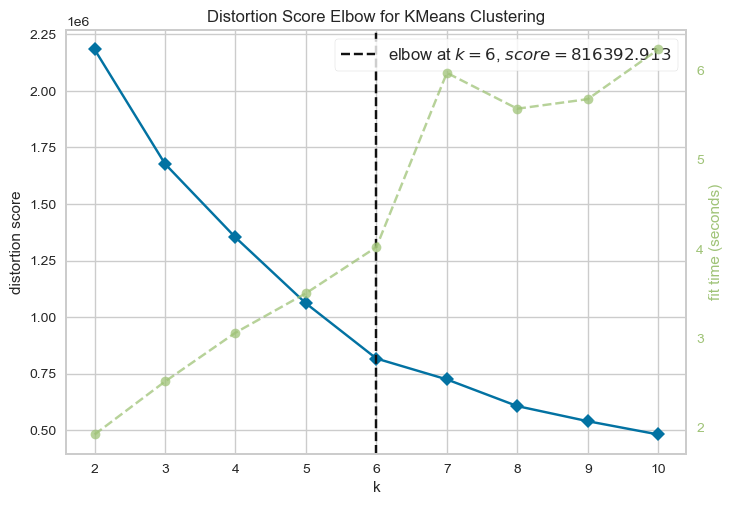

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [116]:
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer


k_elbow = KElbowVisualizer(KMeans(),k=10)
k_elbow.fit(df_pca)
k_elbow.show()

In [117]:
import matplotlib.pyplot as plt

In [ ]:
t = 1
plt.figure(figsize=(12,20))
for i in range(2,16):
    plt.subplot(10,2,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(df_pca)
    plt.title('K: %d, Score: %.2f'%(i,sil_viz.silhouette_score_))
    t+=1
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silo_score = []
n_clus = [2,3,4,5,6,7,8,9,11,13,14]
for i in n_clus:
    model = KMeans(n_clusters=i)
    pred = model.fit_predict(df_pca)
    silo_score.append(silhouette_score(df_pca,pred))

As the data is very huge in size I am not able to make a model on my machine ......

The END......